# Exploratory Analysis of the Indicators

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
%matplotlib inline

In [ ]:
#read cleaned data for analysis
data_df = pd.read_csv("F:\Key_Economics_Indicator_EDA\Extracted Data\IndicatorsData_cleaned.csv") #data csv path
data_df.columns

In [91]:
data_df.columns

Index(['country', 'country code', 'countryiso3code', 'date', 'NE.EXP.GNFS.ZS',
       'BX.KLT.DINV.CD.WD', 'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD.ZG',
       'NE.IMP.GNFS.ZS', 'NY.GDP.DEFL.KD.ZG', 'EN.POP.DNST', 'SP.POP.GROW',
       'SP.POP.TOTL', 'AG.SRF.TOTL.K2', 'SP.URB.GROW'],
      dtype='object')

**Let us first consider only one country to better understand the relationship of the variables**

In [92]:
column_rename = { 'NE.EXP.GNFS.ZS': 'Exports percentGDP',
       'BX.KLT.DINV.CD.WD':'FDI', 'NY.GDP.MKTP.CD':'GDP', 'NY.GDP.MKTP.KD.ZG':'GDP growth',
       'NE.IMP.GNFS.ZS':'Imports percentGDP', 'NY.GDP.DEFL.KD.ZG':'Inflation', 'EN.POP.DNST':'Population Density', 'SP.POP.GROW':'Population Growth',
       'SP.POP.TOTL':'Total Population', 'AG.SRF.TOTL.K2':'Total Surface Area', 'SP.URB.GROW':'Population Growth Urban'
}

In [95]:
data_df.rename(column_rename,axis=1 ,inplace=True, errors='raise')

In [96]:
data_df.head(5)

,country,country code,countryiso3code,date,Exports percentGDP,FDI,GDP,GDP growth,Imports percentGDP,Inflation,Population Density,Population Growth,Total Population,Total Surface Area,Population Growth Urban
0,Afghanistan,AF,AFG,2020,0.0,1.297015e+07,2.011614e+10,-2.351101,0.0,7.821667,59.627395,2.303812,38928341.0,0.0,3.354421
1,Afghanistan,AF,AFG,2019,0.0,2.340455e+07,1.879945e+10,3.911603,0.0,6.521480,58.269395,2.313073,38041757.0,0.0,3.323827
2,Afghanistan,AF,AFG,2018,0.0,1.194351e+08,1.805323e+10,1.189228,0.0,2.071349,56.937049,2.384309,37171922.0,652860.0,3.349934
3,Afghanistan,AF,AFG,2017,0.0,5.153390e+07,1.875347e+10,2.647003,0.0,2.403656,55.595550,2.547833,36296111.0,652860.0,3.462893
4,Afghanistan,AF,AFG,2016,0.0,9.359132e+07,1.811656e+10,2.260314,0.0,-2.197526,54.196961,2.778035,35383028.0,652860.0,3.649128


In [97]:
india_df = data_df[data_df['country']=='India'].drop(columns=['country code', 'countryiso3code'])

In [98]:
#Making the FDI column as a percent of GDP rather than an absolute value
india_df['FDI percentGDP'] = (india_df['FDI']/india_df['GDP'])*100

In [99]:
india_df.head(5)

,country,date,Exports percentGDP,FDI,GDP,GDP growth,Imports percentGDP,Inflation,Population Density,Population Growth,Total Population,Total Surface Area,Population Growth Urban,FDI percentGDP
1806,India,2020,18.708899,6.436236e+10,2.667688e+12,-6.596081,19.096455,5.600919,464.149410,0.989414,1.380004e+09,0.0,2.297828,2.412665
1807,India,2019,18.690983,5.061065e+10,2.831552e+12,3.737919,21.271545,2.390749,459.579696,1.013261,1.366418e+09,0.0,2.303752,1.787382
1808,India,2018,19.927829,4.211745e+10,2.702930e+12,6.453851,23.689141,3.884240,454.946466,1.037828,1.352642e+09,3287259.0,2.309470,1.558215
1809,India,2017,18.791765,3.996609e+10,2.651473e+12,6.795383,21.950732,3.969258,450.249321,1.063359,1.338677e+09,3287259.0,2.315210,1.507317
1810,India,2016,19.158235,4.445857e+10,2.294798e+12,8.256306,20.924251,3.237975,445.486918,1.090459,1.324517e+09,3287259.0,2.318510,1.937363


<AxesSubplot:xlabel='date', ylabel='GDP growth'>

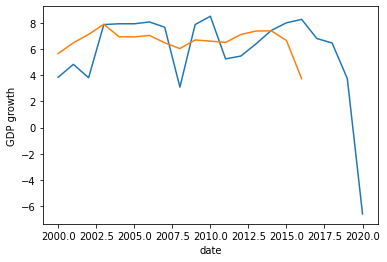

In [100]:
#plotting the GDP growth over the year
sb.lineplot(x=india_df['date'],y= india_df['GDP growth'])
sb.lineplot(x=india_df['date'],y= india_df['GDP growth'].rolling(5).mean())

<AxesSubplot:xlabel='date', ylabel='GDP'>

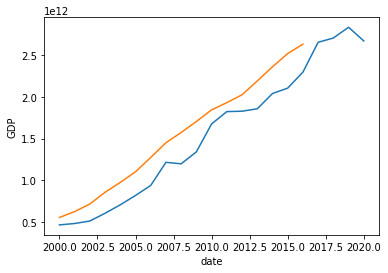

In [101]:
sb.lineplot(x=india_df['date'], y=india_df['GDP'])
sb.lineplot(x=india_df['date'], y=india_df['GDP'].rolling(5).mean())

<AxesSubplot:xlabel='date', ylabel='FDI percentGDP'>

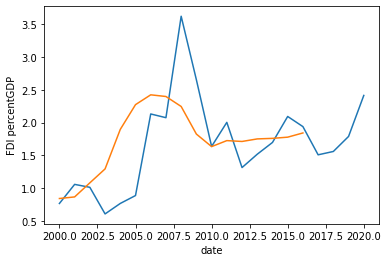

In [102]:
sb.lineplot(x=india_df['date'], y=india_df['FDI percentGDP'])
sb.lineplot(x=india_df['date'], y=india_df['FDI percentGDP'].rolling(5).mean())

<AxesSubplot:xlabel='date', ylabel='Exports percentGDP'>

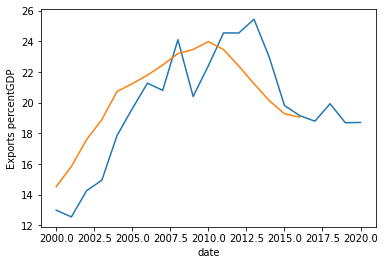

In [110]:
sb.lineplot(x=india_df['date'], y=india_df['Exports percentGDP'])
sb.lineplot(x=india_df['date'], y=india_df['Exports percentGDP'].rolling(5).mean())

<AxesSubplot:xlabel='date', ylabel='Imports percentGDP'>

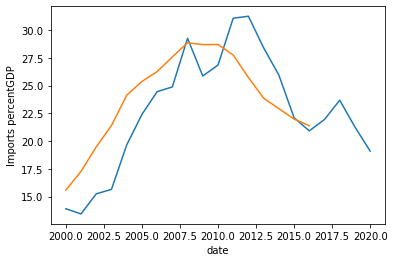

In [103]:
sb.lineplot(x=india_df['date'], y=india_df['Imports percentGDP'])
sb.lineplot(x=india_df['date'], y=india_df['Imports percentGDP'].rolling(5).mean())

<AxesSubplot:xlabel='date', ylabel='Inflation'>

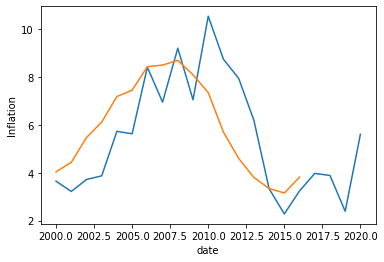

In [105]:
sb.lineplot(x=india_df['date'], y=india_df['Inflation'])
sb.lineplot(x=india_df['date'], y=india_df['Inflation'].rolling(5).mean())

<AxesSubplot:xlabel='date', ylabel='Population Growth'>

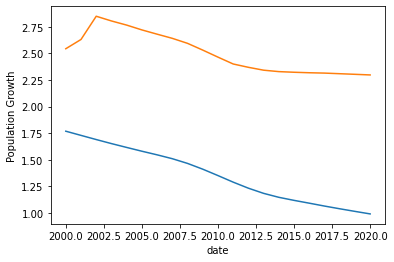

In [104]:
sb.lineplot(x=india_df['date'], y=india_df['Population Growth'])
sb.lineplot(x=india_df['date'], y=india_df['Population Growth Urban'])

<AxesSubplot:xlabel='GDP growth'>

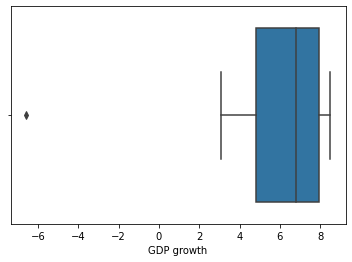

In [108]:
sb.boxplot(x=india_df['GDP growth'])

***Let us confine this analysis to top 10 countries based on some of the descriptor indicators as done below***

- Top countries based on GDP size for the latest data

In [ ]:
top_countries_by_gdp = data_df[data_df["date"]==2020].sort_values(by="NY.GDP.MKTP.CD", na_position="last", ascending=False ).country.head(10)

In [ ]:
top_countries_by_gdp

- selecting top 10 countries by highest GDP growth averaged out over last 10 years, since considering only one year for growth factor may be misleading because of effects of short term phenomenon 

In [ ]:
top_countries_by_average_gdp = data_df.loc[data_df['date']>2015, ['country', 'NY.GDP.MKTP.KD.ZG']].groupby(by=['country']).mean().sort_values(by='NY.GDP.MKTP.KD.ZG',ascending=False).head(10)

In [ ]:
top_countries_by_average_gdp

- Profiling countries by largest population and highest growth rate of population

In [ ]:
top_countries_by_pop = data_df[data_df["date"]==2020].sort_values(by="SP.POP.TOTL", na_position="last", ascending=False ).country.head(10)

In [ ]:
top_countries_by_pop

In [ ]:
top_countries_by_average_popgrowth = data_df.loc[data_df['date']>2015, ['country', 'SP.POP.GROW']].groupby(by=['country']).mean().sort_values(by='SP.POP.GROW',ascending=False).head(10)

In [ ]:
top_countries_by_average_popgrowth

- we now have 4 parameters that can be used to base our analysis on - We will explore each set in the next sections

# Top Countries by Population

In [ ]:
indicator_df = data_df[data_df['country'].isin(top_countries_by_pop)]

In [ ]:
indicator_df.drop(columns=['country code', 'countryiso3code'], inplace=True)

In [ ]:
pivot = pd.pivot_table(indicator_df, values = 'NY.GDP.MKTP.KD.ZG' , index='country', columns='date')

In [ ]:
pivot